# Interactive Lecture October 3rd 2019


    
## Polynomial Interpolation

Given $n$ (distinct) node points $\{x_0,\ldots,x_n\} \in [a,b]$ and some function $f:[a,b] \to \mathbb R$, we defined the interpolation polynomial as the polynomial $p_n \in \mathcal P_n$ ($\mathcal P_n$ denotes the space of polynomials of degree $\leq n$) which satisfy

$$ p(x_i) = f(x_i), \quad i=0,\ldots,n $$

We will write this as $p(f \mid x_0, \ldots, x_n)$. 

### Lagrange Polynomials

Recall from last time, that using the Lagrange polynomials 

$$ l_i(x) := \prod_{j\neq i} \frac{x-x_j}{x_i-x_j}, $$

we can express the interpolating polynomial as 

$$ p(f \mid x_0,\ldots,x_n)(x) = \sum_{i=0}^nf(x_i)l_i(x) $$

Observe that the lagrange polynomials $\{l_i\}_{i=0}^n$ can be seen as a basis for the space of polynomials and $f(x_i)$ is the coefficient for each basis function $l_i$.

#### Adding Data Points

Now assume that we want to add a new data point $(x_{n+1},y_{n+1})$. Observe that the Lagrange polynomials $l_i$ depend on every data point $x_j$, including the new point $x_{n+1}$. This means that we must reconstruct all the Lagrange polynomials in order to interpolate the new point $(x_{n+1},y_{n+1})$. The question is whether we can use another basis for $\mathcal P_n$ such that we do not need to reconstruct all the basis polynomials when adding a new point?



### Newton Polynomials

Using Newton polynomials is another way to compute interpolating polynomials given a set of data points. These polynomials can be defined as

\begin{alignat}{2}
    w_0(x) &= 1\\
    w_1(x) &= (x-x_0) &&= (x-x_0)w_0(x)\\
    w_2(x) &= (x-x_0)(x-x_1) &&= (x-x_1)w_1(x)\\
    w_3(x) &= (x-x_0)(x-x_1)(x-x_2) &&= (x-x_2)w_2(x)\\
    &\,\ \vdots&&\,\ \vdots\\
    w_n(x) &= (x-x_0)(x-x_1)\dotsm(x-x_{n-1}) &&= (x-x_{n-1})w_{n-1}(x).
\end{alignat}

Observe that these can both be defined through a product

$$ w_i(x) = \prod_{j=0}^{i-1} (x-x_j) $$

or through a recursion formula $ w_i(x) = (x-x_{i-1}) w_{i-1}(x) $. Two important property for the Newton polynomials are
\begin{align}
    w_i(x_j) &= 0 \text{ for all } i>j,\\
    w_i(x_i) &\neq 0 \text{ for all } i.
\end{align}
The second property comes from the fact that the $x_i$'s are distinct. 

<font color = "darkblue">

**1a)** Using $x_i = i$ for $i=0,1,2,3$, write out the Newton polynomials $w_0(x)$, $w_1(x)$, $w_2(x)$ and $w_3(x)$ explicitly. 

</font>

<font color = "darkred">

We have that 

\begin{alignat}{3}
    w_0(x) &= 1\\
    w_1(x) &= (x-0)w_0(x) &&= x\\
    w_2(x) &= (x-1)w_1(x) &&= (x-1)x &&= x^2-x \\
    w_3(x) &= (x-2)w_2(x) &&= (x-2)(x-1)x &&= x^3-3x^2+2x
\end{alignat}

</font>

### Newton Polynomials as a Basis

The newton polynomials acts as a basis for the vector space $\mathcal P_n$. That is,

1. For all $p\in\mathcal P_n$, there are coefficients $a_0,\ldots,a_n$ such that $p(x) = \sum_{i=0}^n a_iw_i(x)$.

2. Whenever there are coefficients $a_0,\ldots,a_n$ such that $\sum_{i=0}^n a_iw_i(x) = 0$ for all $x$, then we must have that $a_0 = a_1 = \ldots = a_n = 0$.

This can be proved by the following: We have $n+1$ polynomials $w_0,\ldots,w_n \in \mathcal P_n$. Further, since the dimension of $\mathcal P_n$ is $n+1$, it is sufficient to prove that the polynomials $w_0,\ldots,w_n \in \mathcal P_n$ are linearly independent. 

<font color="darkblue">

**1b)** Prove that the polynomials $w_0,\ldots,w_n$ are linearly independent. That is, assume that $w_0,\ldots w_n$ are the Newton polynomials given the nodes $x_0,\ldots, x_n$. Then, prove that if

$$ z(x) := \sum_{i=0}^na_iw_i(x) = 0. $$

for all $x$, we must have $a_0 = a_1 = \ldots =a_n=0$.


*Hint: Use induction.*
- *First show that $a_0=0$ by writing out $z(x_0)$.*
- *Then assume that $a_0,\ldots,a_{j-1}=0$ and show that this implies $a_j=0$ (by writing out $z(x_j)$).*

*You might also need the two properties written above Exercise 1a).*
</font>


<font color ="darkred">

Base case; proving that $a_0=0$. We have that $w_0(x_0) = 1$ and $w_i(x_0) = 0$ for $i\geq 1$. This means that
\begin{align}
    z(x_0) &= \sum_{i=0}^n a_iw_i(x_0) \\
    &= a_0w_0(x_0) + \sum_{i=1}^n a_iw_i(x_0)\\
    &= a_i\cdot 1 + \sum_{i=1}^n a_i\cdot 0 \\
    &= a_i. 
\end{align}
In other words, we have that $a_i = 0$.

Induction step; assume that $a_0=\ldots= a_{j-1}=0$. Further, We have that $w_i(x_j) = 0$ for $i>j$. This means that 
\begin{align}
    z(x_j) &= \sum_{i=0}^n a_iw_i(x_j) \\
    &= a_jw_j(x_j) + \sum_{i=j+1}^n a_iw_i(x_j)\\
    &= a_jw_j(x_j) + \sum_{i=j+1}^n a_i\cdot 0 \\
    &= a_jw_j(x_j). 
\end{align}

Since $w_j(x_j)\neq 0$, we must have that $a_j = 0$.

</font>

## Interpolation Using Newton Polynomials


Using Newton polynomials, the interpolating polynomial will now be a polynomial of the form

$$ p(f \mid x_0,\ldots,x_n)(x) = \sum_{i=0}^na_iw_i(x). $$

The question is how to find the coefficients $a_0,\ldots,a_n$ for a general function $f$. This is typically done using Newtons divided differences.

#### Newton's Divided differences


The Newton's divided differences tells us that $a_i := f[x_0,x_1,\ldots,x_{i-1},x_i]$ where $f[x_0,x_1,\ldots,x_{i-1},x_i]$ can be computed through the recursion formula

\begin{align}
    f[x_i] &= f(x_i) \\
    f[x_{i}, \ldots, x_j] &= \frac{f[x_{i+1}, \ldots, x_j] - f[x_i, \ldots, x_{j-1}]}{x_j-x_i}
    \tag{1}
\end{align}

The values of the Newton's divided differences are commonly stored in a lower triangular matrix

$$
\left.
\begin{matrix}
    x_0\\
    x_1\\
    x_2\\
    \vdots\\
    x_n
\end{matrix}
\right|
\begin{matrix}
    f[x_0]\\
    f[x_1] & f[x_0,x_1] \\
    f[x_2] & f[x_1,x_2] & f[x_0,x_1,x_2] \\
    \vdots & \vdots & \vdots & \ddots\\
    f[x_n] & f[x_{n-1},x_n] & f[x_{n-2},x_{n-1},x_n] & \dotsm & f[x_0,\ldots,x_{n-1},x_n]
\end{matrix}
$$



<font color="darkblue">

**1c)** Using $f(x) = \sin(\tfrac\pi2 x)$ and nodes $x_i = i$ for $i=0,1,2,3,4$, fill out the Newton divided difference table.

</font>

<font color="darkred">

$$
\left.
\begin{matrix}
    0\\
    1\\
    2\\
    3\\
    4
\end{matrix}
\right|
\begin{matrix}
     0 \\
     1 &  1 \\
     0 & -1 & -1 \\
    -1 & -1 &  0 & 1/3 \\
     0 &  1 &  1 & 1/3 & 0
\end{matrix}
$$

</font>

Considering Newton's divided differences as a lower triangular matrix $d$, the elements of $d$ are $d_{i,j} = 
f[x_{i-j},\ldots x_{i}]$ (note that $d$ is zero-indexed for simplicity of notation). 

<font color = "darkblue">
    
**1d)** Express the recursion formula (1) using $d_{i,j}$.

</font>

<font color = "darkred">

Then, the recursion formula (1) expressed in terms of $d$ is given by

\begin{align}
    d_{i,0} &= f(x_i)\\
    d_{i,j} &= \frac{d_{i,j-1} - d_{i-1,j-1}}{x_i - x_{i-j}}. 
\end{align}

</font>

## Implementation

<font color = "darkblue">

**2a)** Implement Newton's divided difference scheme. Test $f(x) = \sin(\tfrac\pi2x)$ using nodes $x_i=i$ for $i=0,1,2,3,4$ and compare with your results in 1c.

</font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True) # Ensures no scientific notation when priting

In [6]:
def dividif(X, f):
    # X: nodes x_0, x_1, ..., x_n
    # f: function to interpolate
    
    
    # Initialize divided difference table
    n = X.shape[0]-1
    d = np.zeros((n+1,n+1))
    
    
    # Fill the first column of the table
    Y = f(X)
    for i in range(n+1):
        d[i,0] = Y[i]
    
    
    # Iteratively fill out the rest of the table
    for i in range(1,n+1):
        for j in range(1,i+1):
            d[i,j] = (d[i,j-1] - d[i-1,j-1]) / (X[i]-X[i-j])
    
    
    return d


X = np.array([0,1,2,3,4]) # Nodes X = [x_0,x_1,...]
f = lambda x: np.sin(np.pi/2*x)


# Example of usage: the following line computes the divided differences of f using nodes X
d = dividif(X, f)
print(d)

[[ 0.          0.          0.          0.          0.        ]
 [ 1.          1.          0.          0.          0.        ]
 [ 0.         -1.         -1.          0.          0.        ]
 [-1.         -1.         -0.          0.33333333  0.        ]
 [-0.          1.          1.          0.33333333  0.        ]]


<font color = "darkblue">

**2b)** Implement a method for evaluating the Newton polynomial $w_i$. Plot the polynomials $w_0$, $w_1$, $w_2$, $w_3$ and $w_4$, using nodes at $x_i = i$, $i=0,1,2,3,4$.

</font>

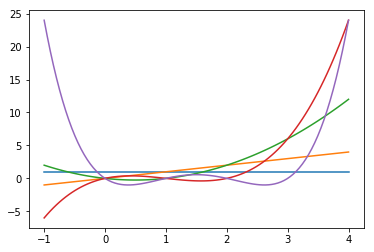

In [8]:
def newtonPoly(x, X, i):
    # x: value to evaluate the polynomial
    # X: nodes x_0, x_1, ..., x_n
    # i: which polynomial to evaluate
    
    # Initialize the polynomial with the same shape as x
    w = np.ones(x.shape)
    
    
    # Compute the polynomial by filling the values of w
    for j in range(i):
        w = w*(x-X[j])
    
    
    return w


X = np.array([0,1,2,3,4]) # Nodes X = [x_0,x_1,...]
x = np.linspace(-1,4,100) # The values x for which we want to evaluate the polynomial


# Example of usage: the following line evaluates the polynomial w_2
w_0 = newtonPoly(x, X, 0)
w_1 = newtonPoly(x, X, 1)
w_2 = newtonPoly(x, X, 2)
w_3 = newtonPoly(x, X, 3)
w_4 = newtonPoly(x, X, 4)

plt.plot(x,w_0)
plt.plot(x,w_1)
plt.plot(x,w_2)
plt.plot(x,w_3)
plt.plot(x,w_4)
plt.show()

<font color = "darkblue">

**2c)** Use your previous two functions to create a function which interpolates $f(x)$ at nodes $x_i$. 

With $f(x) = \sin(\frac\pi2x)$, plot both $f(x)$ and the interpolating polynomial $p(f\mid x_0,x_1,\ldots x_n)(x)$ using 

- One node: $\{x_i\} = \{0\}$
- Two nodes: $\{x_i\} = \{0,1\}$
- Three nodes: $\{x_i\} = \{0,1,2\}$
- Four nodes: $\{x_i\} = \{0,1,2,3\}$
- Five nodes: $\{x_i\} = \{0,1,2,3,4\}$

Also mark the nodes $(x_i,f(x_i))$ to see whether the polynomial actually interpolates the function. Is there any difference between using four or five nodes?
</font>

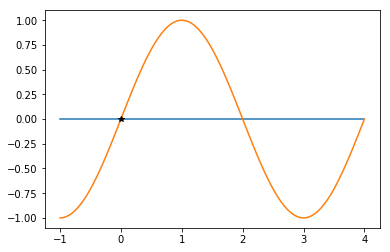

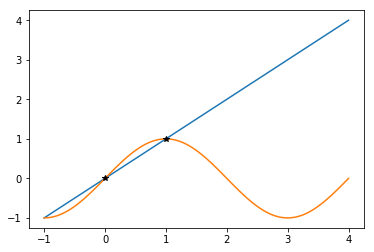

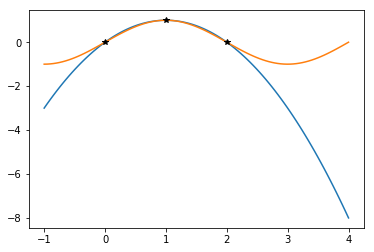

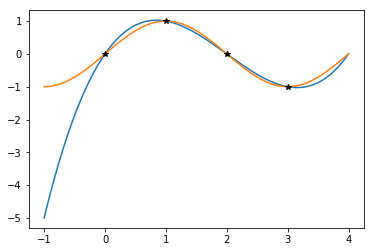

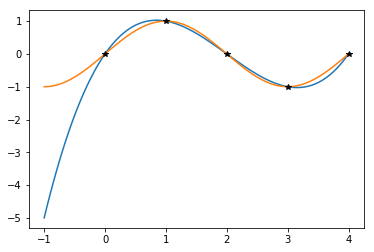

In [17]:
def interpolate(x, X, f):
    # x: value to evaluate the polynomial
    # X: nodes x_0, x_1, ..., x_n
    # f: function to interpolate
    
    # Compute the divided differences table
    d = dividif(X,f)
    
    # Initialize the polynomial with the same shape as x
    p = np.zeros(x.shape)
    
    
    # Evaluate the polynomial
    for i in range(X.shape[0]):
        p = p + d[i,i]*newtonPoly(x, X, i)
    
    
    return p


x = np.linspace(-1,4,100) # The values x for which we want to evaluate the polynomial


# Example of usage: the following lines evaluates the interpolating polynomial given nodes X
for i in range(5):
    X = np.arange(i+1)
    p = interpolate(x, X, f)
    plt.plot(x,p)
    plt.plot(x,f(x))
    plt.plot(X,f(X),'k*')
    plt.show()